# **Projeto Final Cientista de Dados**

# *O Projeto*

Boa tarde, meu nome é Eduardo Ramiro Cisconi, e este é o meu projeto final para o curso de ciência de dados.

Neste projeto, o objetivo é desenvolver um modelo de machine learning capaz de diagnosticar corretamente o hipotireoidismo com base em dados clínicos. Utilizaremos uma base pública, que já foi amplamente utilizada para essa finalidade.

O meu projeto consiste em apresentar uma base de dados sobre hipotireoidismo, com a finalidade de conseguir resultados precisos em relação ao diagnóstico positivo ou negativo de cada paciente, de acordo com seus dados, como por exemplo, idade, gênero, e exames médicos.

A partir de agora irei demonstrar passo a passo como foi feito o trabalho completo, deixando claro o que foi feito em cada etapa.

# 1 - Importação

Nesta etapa, fazemos a importação de todas as bibliotecas necessárias, e também da base de dados com a qual vamos trabalhar.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import warnings; warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('Base_M43_Pratique_Hypothyroid.csv')

# 2 - Tratamento dos Dados

Aqui faremos o tratamento, análise e gráficos para obter mais informações sobre a nossa base.

Neste caso, transformei as variáveis em numéricas para poder trabalhar com elas nas previsões, tratei os dados nulos, avaliando que a melhor decisão seria excluí-los, como poderia trabalhar sem eles, excluí também variáveis que não faziam diferença para a previsão, e por final, fiz boxplots para analisar se haviam outliers, e tratei devidamente também.

Outra decisão que tomei foi não trazer gráficos com análises sobre as variáveis, como eu já sabia que iria fazer a tabela de correlação, e daria pra perceber o que fosse necessário lá.

Essa foi a parte mais extensa e elaborada do código, como cada variável e seus respectivos dados precisavam ser tratados com cuidado para que não houvesse uma falta deles para o momento que fosse feita a previsão.

In [11]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [12]:
df.replace('?', pd.NA, inplace=True)

In [13]:
df.dtypes

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
TBG                         

In [14]:
df.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [15]:
(df.isnull().sum() / len(df)) * 100

age                            0.026511
sex                            3.976670
on thyroxine                   0.000000
query on thyroxine             0.000000
on antithyroid medication      0.000000
sick                           0.000000
pregnant                       0.000000
thyroid surgery                0.000000
I131 treatment                 0.000000
query hypothyroid              0.000000
query hyperthyroid             0.000000
lithium                        0.000000
goitre                         0.000000
tumor                          0.000000
hypopituitary                  0.000000
psych                          0.000000
TSH measured                   0.000000
TSH                            9.782609
T3 measured                    0.000000
T3                            20.387063
TT4 measured                   0.000000
TT4                            6.124072
T4U measured                   0.000000
T4U                           10.259809
FTI measured                   0.000000


In [16]:
df.drop(columns=['TSH measured'], inplace=True)
df.drop(columns=['T3 measured'], inplace=True)
df.drop(columns=['TT4 measured'], inplace=True)
df.drop(columns=['T4U measured'], inplace=True)
df.drop(columns=['FTI measured'], inplace=True)
df.drop(columns=['TBG measured'], inplace=True)
df.drop(columns=['TBG'], inplace=True)

In [17]:
df['age'].unique()

array(['41', '23', '46', '70', '18', '59', '80', '66', '68', '84', '67',
       '71', '28', '65', '42', '63', '51', '81', '54', '55', '60', '25',
       '73', '34', '78', '37', '85', '26', '58', '64', '44', '48', '61',
       '35', '83', '21', '87', '53', '77', '27', '69', '74', '38', '76',
       '45', '36', '22', '43', '72', '82', '31', '39', '49', '62', '57',
       '1', '50', '30', '29', '75', '19', '7', '79', '17', '24', '15',
       '32', '47', '16', '52', '33', '13', '10', '89', '56', '20', '90',
       '40', '88', '14', '86', '94', '12', '4', '11', '8', '5', '455',
       '2', '91', '6', <NA>, '93', '92'], dtype=object)

In [18]:
df['sex'].unique()

array(['F', 'M', <NA>], dtype=object)

In [19]:
df['on thyroxine'].unique()

array(['f', 't'], dtype=object)

In [20]:
df['query on thyroxine'].unique()

array(['f', 't'], dtype=object)

In [21]:
df['on antithyroid medication'].unique()

array(['f', 't'], dtype=object)

In [22]:
df['sick'].unique()

array(['f', 't'], dtype=object)

In [23]:
df['pregnant'].unique()

array(['f', 't'], dtype=object)

In [24]:
df['thyroid surgery'].unique()

array(['f', 't'], dtype=object)

In [25]:
df['I131 treatment'].unique()

array(['f', 't'], dtype=object)

In [26]:
df['query hypothyroid'].unique()

array(['f', 't'], dtype=object)

In [27]:
df['query hyperthyroid'].unique()

array(['f', 't'], dtype=object)

In [28]:
df['lithium'].unique()

array(['f', 't'], dtype=object)

In [29]:
df['goitre'].unique()

array(['f', 't'], dtype=object)

In [30]:
df['tumor'].unique()

array(['f', 't'], dtype=object)

In [31]:
df['hypopituitary'].unique()

array(['f', 't'], dtype=object)

In [32]:
df['psych'].unique()

array(['f', 't'], dtype=object)

In [33]:
df['referral source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [34]:
df['binaryClass'].unique()

array(['P', 'N'], dtype=object)

In [35]:
df.dropna(subset=['age'], inplace=True)
df.dropna(subset=['sex'], inplace=True)
df.dropna(subset=['TSH'], inplace=True)
df.dropna(subset=['T3'], inplace=True)
df.dropna(subset=['TT4'], inplace=True)
df.dropna(subset=['T4U'], inplace=True)
df.dropna(subset=['FTI'], inplace=True)

In [36]:
df['age'] = df['age'].astype(int)
df['TSH'] = df['TSH'].astype(float)
df['T3'] = df['T3'].astype(float)
df['TT4'] = df['TT4'].astype(float)
df['T4U'] = df['T4U'].astype(float)
df['FTI'] = df['FTI'].astype(float)

In [37]:
label_encoder = LabelEncoder()

gender_mapping = {'F': 0, 'M': 1}
gender_mapping_2 = {'f': 0, 't': 1}
gender_mapping_3 = {'N': 0, 'P': 1}
df['sex'] = df['sex'].replace(gender_mapping)
df['on thyroxine'] = df['on thyroxine'].replace(gender_mapping_2)
df['query on thyroxine'] = df['query on thyroxine'].replace(gender_mapping_2)
df['on antithyroid medication'] = df['on antithyroid medication'].replace(gender_mapping_2)
df['sick'] = df['sick'].replace(gender_mapping_2)
df['pregnant'] = df['pregnant'].replace(gender_mapping_2)
df['thyroid surgery'] = df['thyroid surgery'].replace(gender_mapping_2)
df['I131 treatment'] = df['I131 treatment'].replace(gender_mapping_2)
df['query hypothyroid'] = df['query hypothyroid'].replace(gender_mapping_2)
df['query hyperthyroid'] = df['query hyperthyroid'].replace(gender_mapping_2)
df['lithium'] = df['lithium'].replace(gender_mapping_2)
df['goitre'] = df['goitre'].replace(gender_mapping_2)
df['tumor'] = df['tumor'].replace(gender_mapping_2)
df['hypopituitary'] = df['hypopituitary'].replace(gender_mapping_2)
df['psych'] = df['psych'].replace(gender_mapping_2)
df['binaryClass'] = df['binaryClass'].replace(gender_mapping_3)

df['referral source'] = label_encoder.fit_transform(df['referral source'])

In [38]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,1.30,2.5,125.0,1.14,109.0,1,1
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61.0,0.87,70.0,3,1
7,80,0,0,0,0,0,0,0,0,0,...,0,0,0,2.20,0.6,80.0,0.70,115.0,3,1
8,66,0,0,0,0,0,0,0,0,0,...,1,0,0,0.60,2.2,123.0,0.93,132.0,3,1
9,68,1,0,0,0,0,0,0,0,0,...,0,0,0,2.40,1.6,83.0,0.89,93.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,19,0,0,0,0,0,0,0,0,0,...,0,0,0,8.80,2.7,108.0,1.11,97.0,4,0
3768,68,0,0,0,0,0,0,0,0,0,...,0,0,0,1.00,2.1,124.0,1.08,114.0,3,1
3769,74,0,0,0,0,0,0,0,0,0,...,0,0,0,5.10,1.8,112.0,1.07,105.0,4,1
3770,72,1,0,0,0,0,0,0,0,0,...,0,0,0,0.70,2.0,82.0,0.94,87.0,3,1


In [39]:
df.dtypes

age                            int32
sex                            int64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
referral source                int32
binaryClass                    int64
dtype: object

In [40]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral source              0
binaryClass                  0
dtype: int64

In [41]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
count,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,...,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000
mean,53.081725,0.332577,0.100643,0.009081,0.012486,0.042754,0.015513,0.012486,0.015134,0.055240,...,0.021945,0.000378,0.064321,5.035978,2.001150,107.858683,0.995650,109.435906,3.088157,0.918275
std,20.367966,0.471225,0.300913,0.094876,0.111061,0.202341,0.123603,0.111061,0.122110,0.228492,...,0.146531,0.019451,0.245370,23.974851,0.823814,35.460437,0.196445,32.472156,1.141479,0.273998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.005000,0.050000,2.000000,0.250000,2.000000,0.000000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.500000,1.500000,88.000000,0.870000,93.000000,3.000000,1.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.300000,2.000000,103.000000,0.980000,107.000000,3.000000,1.000000
75%,69.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.600000,2.300000,124.000000,1.090000,124.000000,4.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,530.000000,10.600000,430.000000,2.120000,395.000000,4.000000,1.000000


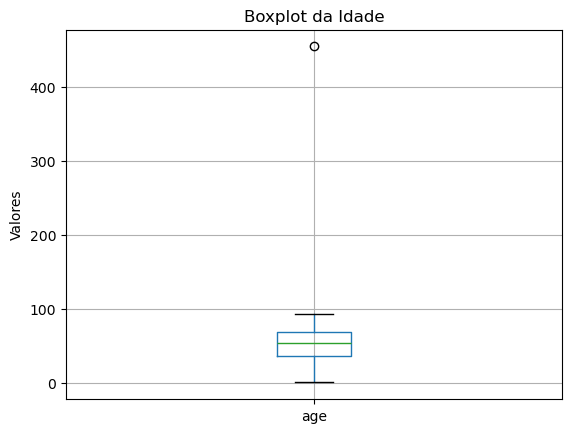

In [42]:
df.boxplot(column='age')
plt.title('Boxplot da Idade')
plt.ylabel('Valores')
plt.show()

In [43]:
df = df[df['age'] < 120]

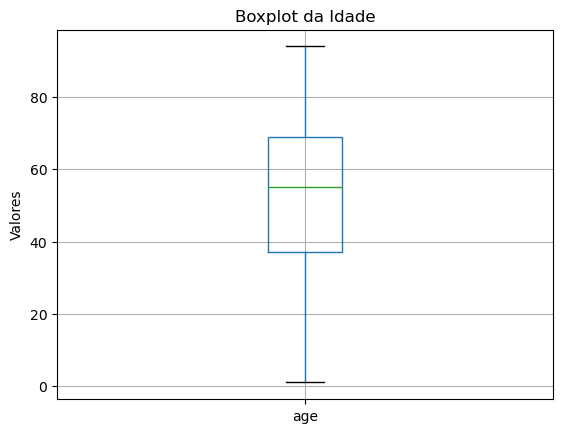

In [44]:
df.boxplot(column='age')
plt.title('Boxplot da Idade')
plt.ylabel('Valores')
plt.show()

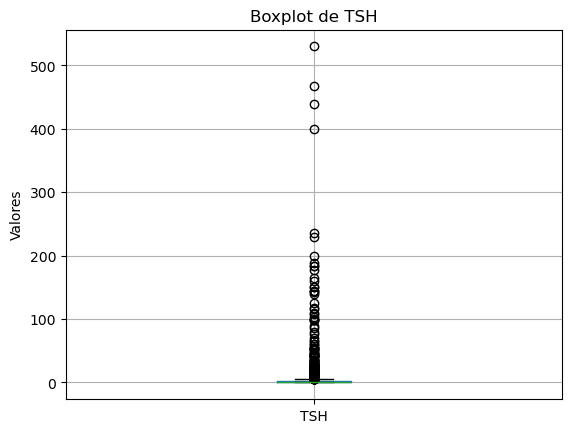

In [45]:
df.boxplot(column='TSH')
plt.title('Boxplot de TSH')
plt.ylabel('Valores')
plt.show()

In [46]:
df[df['TSH'] > 300]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
2772,25,0,0,0,0,0,0,0,0,0,...,0,0,0,468.0,0.7,21.0,1.10,19.0,4,0
3427,18,0,0,0,0,0,0,0,0,0,...,0,0,0,440.0,0.5,24.0,1.32,18.0,4,0
3449,59,0,0,0,0,0,0,0,0,0,...,0,0,0,530.0,2.0,10.0,1.12,8.5,4,0
3639,60,0,1,0,0,0,0,0,0,0,...,0,0,0,400.0,0.5,11.0,1.19,9.1,4,0


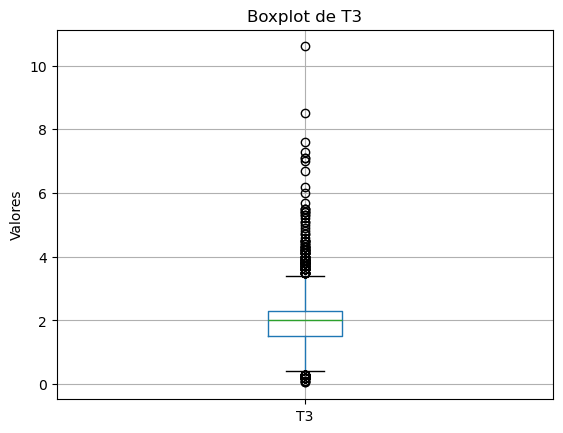

In [47]:
df.boxplot(column='T3')
plt.title('Boxplot de T3')
plt.ylabel('Valores')
plt.show()

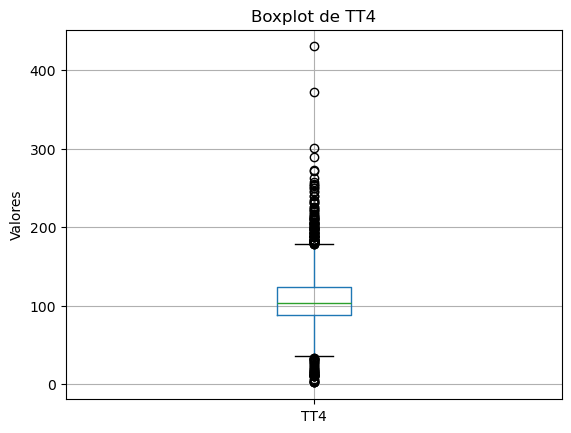

In [48]:
df.boxplot(column='TT4')
plt.title('Boxplot de TT4')
plt.ylabel('Valores')
plt.show()

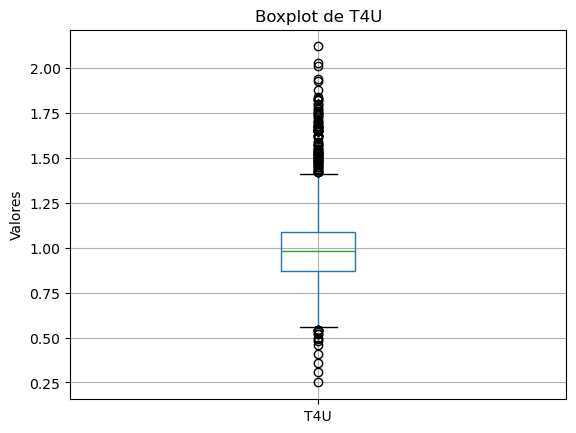

In [49]:
df.boxplot(column='T4U')
plt.title('Boxplot de T4U')
plt.ylabel('Valores')
plt.show()

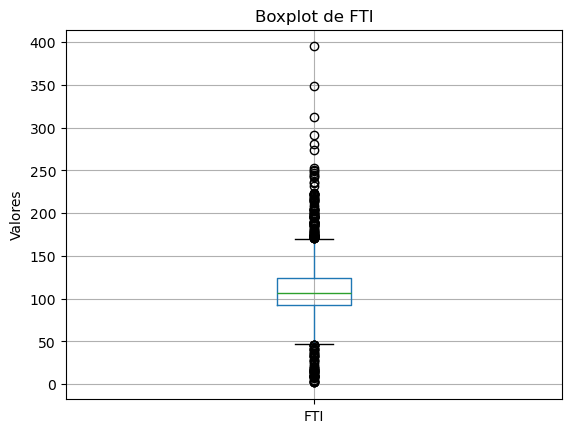

In [50]:
df.boxplot(column='FTI')
plt.title('Boxplot de FTI')
plt.ylabel('Valores')
plt.show()

In [51]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
count,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,...,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000
mean,52.929599,0.332702,0.100681,0.009084,0.012491,0.042771,0.015519,0.012491,0.015140,0.055261,...,0.021953,0.000379,0.064345,5.037468,2.001151,107.854845,0.995600,109.437964,3.088191,0.918244
std,18.810167,0.471270,0.300963,0.094894,0.111082,0.202378,0.123626,0.111082,0.122133,0.228533,...,0.146558,0.019455,0.245413,23.979268,0.823970,35.466601,0.196464,32.478130,1.141694,0.274045
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.005000,0.050000,2.000000,0.250000,2.000000,0.000000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.500000,1.500000,88.000000,0.870000,93.000000,3.000000,1.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.300000,2.000000,103.000000,0.980000,107.000000,3.000000,1.000000
75%,69.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.600000,2.300000,124.000000,1.087500,124.000000,4.000000,1.000000
max,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,530.000000,10.600000,430.000000,2.120000,395.000000,4.000000,1.000000


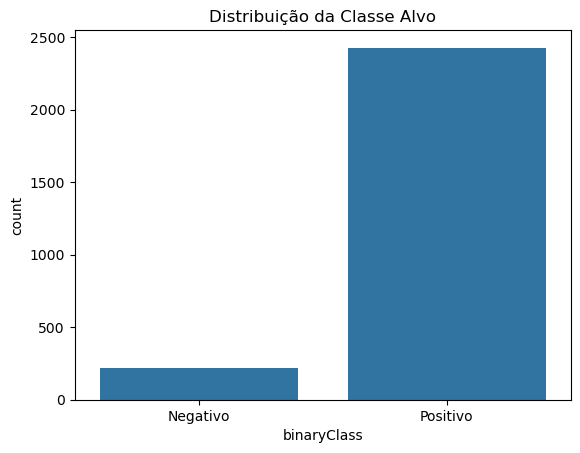

binaryClass
1    0.918244
0    0.081756
Name: proportion, dtype: float64


In [52]:
sns.countplot(data=df, x='binaryClass')
plt.title('Distribuição da Classe Alvo')
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.show()

print(df['binaryClass'].value_counts(normalize=True))

# 3 - Escolha, Treinamento, Avaliação e Otimização do Modelo

Esta é a parte do código em que vamos plotar uma matriz de correlação, para sabermos os próximos passos que seguiremos, que serão a escolha, o treinamento, a avaliação, e a otimização do modelo.

Começamos dividindo os dados em treino e teste, optei pela divisão tradicional, tenho preferência em utilizar essa. A partir daí escolhemos o modelo, que neste caso foi o Random Forest, tendo utilizado outros modelos, conclui que seria a melhor escolha para as previsões.

Depois fazemos o treinamento, aqui fiz algumas escolhas: Quis testar mais de um tipo de avaliação, então fiz 4 tipos de treinamento com os dados.

O primeiro foi basicamente só utilizando o Random Forest.

O segundo foi já fazendo uma otimização, na qual procurei os melhores parâmetros para fazer o treinamento.

O terceiro foi utilizando os melhores parâmetros e também balanceando e padronizando os dados.

O quarto e último foi feito utilizando os melhores parâmetros, dados balanceados e padronizados, mas utilizando apenas as variáveis que possuíam as maiores correlações.

Com todas as avaliações feitas, chegamos a conclusão de que o tratamento dos dados foi bem feito, pois todas as avaliações possuem uma alta acurácia, com muito pouca diferença entre uma e outra, e até chegando em uma acurácia de 1.00 em duas das avaliações.

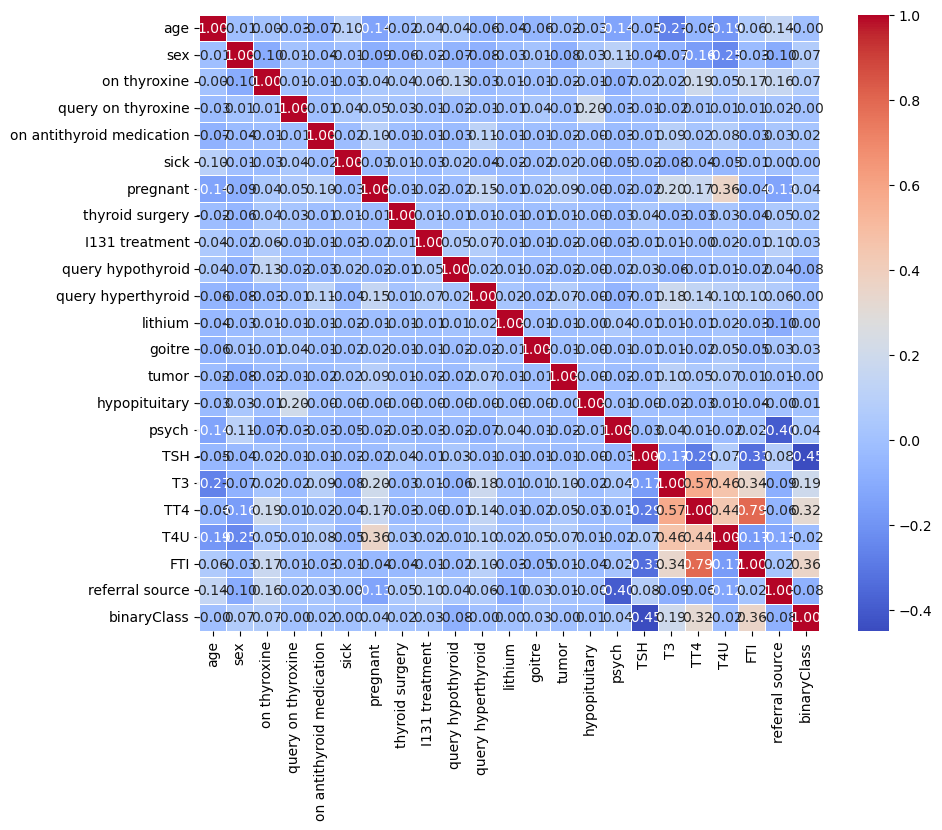

In [55]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [56]:
X = df.drop('binaryClass', axis=1)
Y = df['binaryClass']

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [58]:
rf_model = RandomForestClassifier(random_state=42)

In [59]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [60]:
Y_pred1 = rf_model.predict(X_test)

In [61]:
accuracy = accuracy_score(Y_test, Y_pred1)
report = classification_report(Y_test, Y_pred1)
conf_matrix = confusion_matrix(Y_test, Y_pred1)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 1.00
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      1.00      1.00       481

    accuracy                           1.00       529
   macro avg       0.98      1.00      0.99       529
weighted avg       1.00      1.00      1.00       529

Matriz de Confusão:
 [[ 48   0]
 [  2 479]]


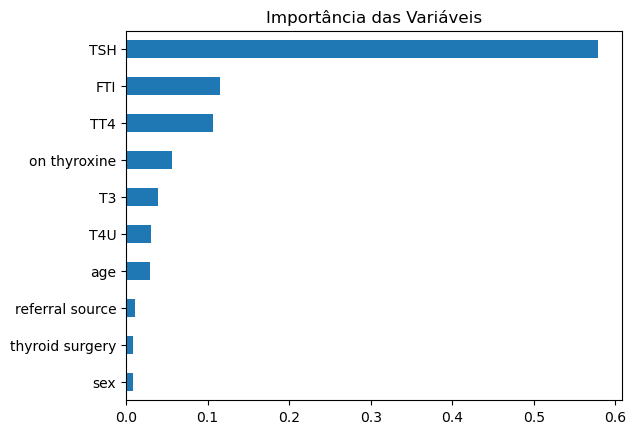

In [62]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).sort_values().plot(kind='barh')
plt.title('Importância das Variáveis')
plt.show()

In [63]:
param_grid = {
    'n_estimators': [25, 30, 35],
    'max_depth': [27, 30, 32, 35],
    'min_samples_split': [7, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [64]:
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

In [65]:
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [27, 30, 32, 35],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [7, 10, 15],
                                        'n_estimators': [25, 30, 35]},
                   random_state=42, scoring='accuracy', verbose=2)

In [66]:
best_params = random_search.best_params_
print(f"Melhores Hiperparâmetros: {best_params}")

Melhores Hiperparâmetros: {'n_estimators': 30, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 27}


In [67]:
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=27, max_features=None, min_samples_split=7,
                       n_estimators=30, random_state=42)

In [68]:
Y_pred2 = best_rf_model.predict(X_test)

In [69]:
accuracy = accuracy_score(Y_test, Y_pred2)
report = classification_report(Y_test, Y_pred2)
conf_matrix = confusion_matrix(Y_test, Y_pred2)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 1.00
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00       481

    accuracy                           1.00       529
   macro avg       1.00      1.00      1.00       529
weighted avg       1.00      1.00      1.00       529

Matriz de Confusão:
 [[ 48   0]
 [  0 481]]


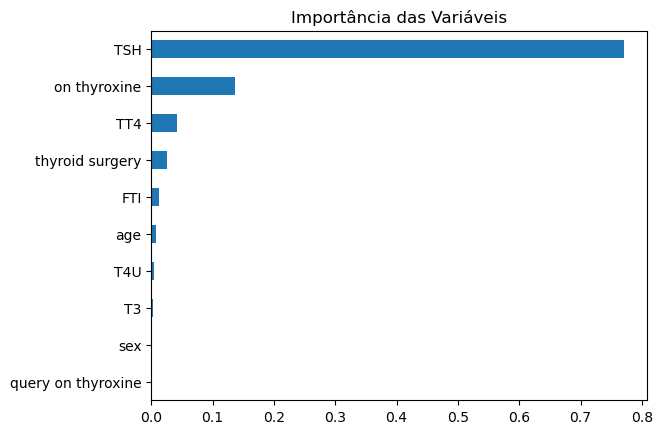

In [70]:
importances = pd.Series(best_rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).sort_values().plot(kind='barh')
plt.title('Importância das Variáveis')
plt.show()

In [71]:
smote = SMOTE(random_state=42)

X_train_balanced, Y_train_balanced = smote.fit_resample(X, Y)

In [72]:
scaler = StandardScaler()

X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

In [73]:
print("Distribuição das classes antes do balanceamento:")
print(Y_train.value_counts())

Distribuição das classes antes do balanceamento:
binaryClass
1    1945
0     168
Name: count, dtype: int64


In [74]:
print("Distribuição das classes antes do balanceamento:")
print(Y_train_balanced.value_counts())

Distribuição das classes antes do balanceamento:
binaryClass
1    2426
0    2426
Name: count, dtype: int64


In [75]:
best_rf_model.fit(X_train_balanced_scaled, Y_train_balanced)

RandomForestClassifier(max_depth=27, max_features=None, min_samples_split=7,
                       n_estimators=30, random_state=42)

In [76]:
Y_pred3 = best_rf_model.predict(X_test_scaled)

In [77]:
accuracy = accuracy_score(Y_test, Y_pred3)
report = classification_report(Y_test, Y_pred3)
conf_matrix = confusion_matrix(Y_test, Y_pred3)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 1.00
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00       481

    accuracy                           1.00       529
   macro avg       1.00      1.00      1.00       529
weighted avg       1.00      1.00      1.00       529

Matriz de Confusão:
 [[ 48   0]
 [  0 481]]


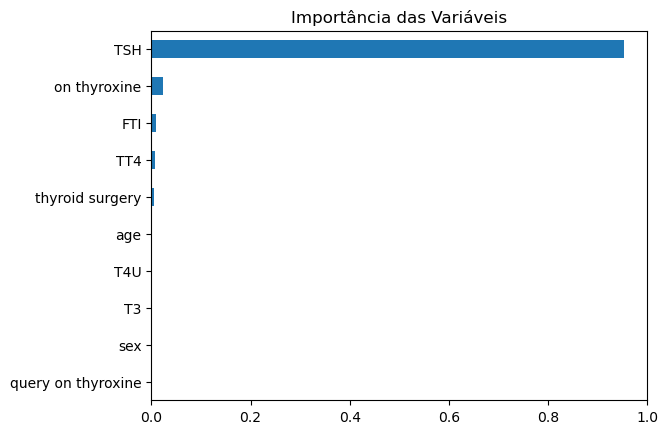

In [78]:
importances = pd.Series(best_rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).sort_values().plot(kind='barh')
plt.title('Importância das Variáveis')
plt.show()

In [79]:
variaveis = ['TSH', 'T3', 'TT4', 'FTI']

In [80]:
X = df[variaveis]
Y = df['binaryClass']

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [82]:
rf_model = RandomForestClassifier(random_state=42)

In [83]:
best_rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=27, max_features=None, min_samples_split=7,
                       n_estimators=30, random_state=42)

In [84]:
Y_pred4 = best_rf_model.predict(X_test)

In [85]:
accuracy = accuracy_score(Y_test, Y_pred4)
report = classification_report(Y_test, Y_pred4)
conf_matrix = confusion_matrix(Y_test, Y_pred4)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 0.99
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        48
           1       0.99      0.99      0.99       481

    accuracy                           0.99       529
   macro avg       0.96      0.96      0.96       529
weighted avg       0.99      0.99      0.99       529

Matriz de Confusão:
 [[ 45   3]
 [  4 477]]


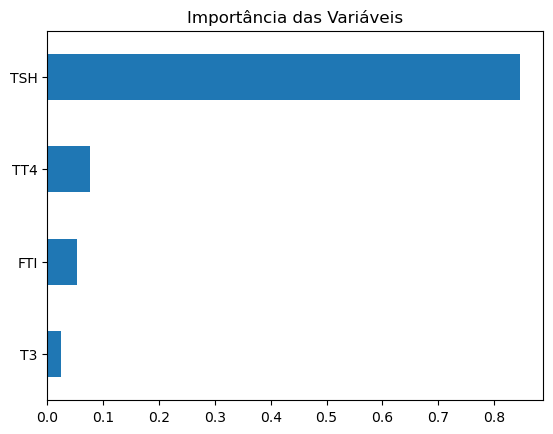

In [86]:
importances = pd.Series(best_rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).sort_values().plot(kind='barh')
plt.title('Importância das Variáveis')
plt.show()

O modelo Random Forest obteve ótima performance na classificação do diagnóstico de hipotireoidismo, com alta acurácia, bom equilíbrio entre precisão e recall e interpretação clara das variáveis mais relevantes, como TSH, TT4 e FTI. A análise demonstrou domínio completo desde o pré-processamento até a modelagem e avaliação, e as visualizações complementam a interpretação dos resultados de forma clara e informativa.

# 4 - Final do Projeto

Aqui terminamos o projeto final do curso de cientista de dados, tendo conseguido chegar em uma acurácia bem alta, pessoalmente eu avalio como um bom projeto, em que obtive sucesso nos meus modelos e previsões.